# PM 2.5

In [1]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv").copy()

In [3]:
df.head()

Unnamed: 0    year  month  day  hour  PM2.5  temperature pressure  rain  \
0           0    2013  -37.0  1.0   0.0    4.0         -0.7   102-37   0.0   
1           1  201-37  -37.0  1.0   1.0    8.0         -1.1   1023.2   0.0   
2           2    2013    3.0  1.0   2.0    7.0         -1.1   1023.5   0.0   
3           3    2013    3.0  1.0   3.0    6.0         -1.4   1024.5   0.0   
4           4    2013    3.0  1.0   4.0    3.0         -2.0   1025.2   0.0   

  wind_direction  wind_speed  
0            NNW         4.4  
1              N         NaN  
2            NNW         5.6  
3             NW         3.1  
4              N         2.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527 entries, 0 to 31526
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      31527 non-null  int64  
 1   year            31512 non-null  object 
 2   month           31521 non-null  float64
 3   day             31507 non-null  float64
 4   hour            31519 non-null  float64
 5   PM2.5           31513 non-null  float64
 6   temperature     31508 non-null  float64
 7   pressure        31500 non-null  object 
 8   rain            31515 non-null  float64
 9   wind_direction  31467 non-null  object 
 10  wind_speed      31502 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.6+ MB


In [5]:
df.describe()

Unnamed: 0         month           day          hour         PM2.5  \
count  31527.000000  31521.000000  31507.000000  31519.000000  3.151300e+04   
mean   16195.784217      6.451001     15.413083     11.288429  2.095628e+03   
std     9514.606331      3.326838     33.139925     37.127145  3.575087e+05   
min        0.000000    -37.000000  -5656.000000  -6464.000000  3.000000e+00   
25%     7888.500000      4.000000      8.000000      5.000000  2.300000e+01   
50%    16279.000000      6.000000     15.000000     11.000000  5.800000e+01   
75%    24371.500000      9.000000     23.000000     18.000000  1.130000e+02   
max    35054.000000     12.000000     31.000000     23.000000  6.346466e+07   

        temperature          rain    wind_speed  
count  31508.000000  31515.000000  31502.000000  
mean      14.356532      0.071744      1.696949  
std       11.296366      0.949720      1.338706  
min      -16.800000      0.000000    -79.000000  
25%        4.300000      0.000000      0.900000  
50%       15.800000      0.000000      1.400000  
75%       23.700000      0.000000      2.200000  
max       40.500000     72.500000     11.200000

In [6]:
df.corr()  # Correlation about Different Columns 

Unnamed: 0     month       day      hour     PM2.5  temperature  \
Unnamed: 0     1.000000  0.053745 -0.000974 -0.004918 -0.009109    -0.018812   
month          0.053745  1.000000  0.007470  0.009215 -0.004149     0.150297   
day           -0.000974  0.007470  1.000000  0.000686 -0.001939     0.014903   
hour          -0.004918  0.009215  0.000686  1.000000  0.001019     0.036235   
PM2.5         -0.009109 -0.004149 -0.001939  0.001019  1.000000    -0.004347   
temperature   -0.018812  0.150297  0.014903  0.036235 -0.004347     1.000000   
rain           0.008747  0.014065  0.000181  0.002572  0.007282     0.033579   
wind_speed     0.093004 -0.145393 -0.009156  0.020382  0.000801     0.038875   

                 rain  wind_speed  
Unnamed: 0   0.008747    0.093004  
month        0.014065   -0.145393  
day          0.000181   -0.009156  
hour         0.002572    0.020382  
PM2.5        0.007282    0.000801  
temperature  0.033579    0.038875  
rain         1.000000    0.021422  
wind_speed   0.021422    1.000000

In [7]:
df.isnull().sum() # Checking for Null Values

Unnamed: 0         0
year              15
month              6
day               20
hour               8
PM2.5             14
temperature       19
pressure          27
rain              12
wind_direction    60
wind_speed        25
dtype: int64

## EDA and Feature Enginnering

In [8]:
df.dropna(inplace=True)

#### We Dropped the Null values as Total null values in this dataset is comparatively low to the size of Dataset

In [9]:
df['year'].value_counts()

2015    8522
2014    8235
2013    7301
2016    7026
2017     287
Name: year, dtype: int64

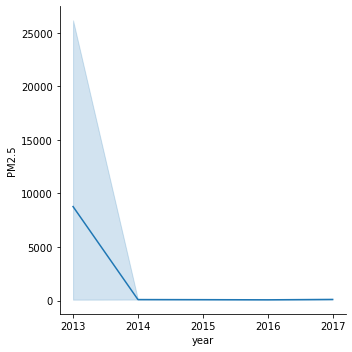

In [10]:
# Line Plot between Year and PM2.5 Column

sns.relplot(x=df['year'],y=df['PM2.5'],data=df,kind='line')

In [11]:
# Just Checking For an Outlier

df[df['year']=='201-37']

Empty DataFrame
Columns: [Unnamed: 0, year, month, day, hour, PM2.5, temperature, pressure, rain, wind_direction, wind_speed]
Index: []

In [12]:
df

Unnamed: 0  year  month   day  hour  PM2.5  temperature pressure  rain  \
0               0  2013  -37.0   1.0   0.0    4.0         -0.7   102-37   0.0   
2               2  2013    3.0   1.0   2.0    7.0         -1.1   1023.5   0.0   
3               3  2013    3.0   1.0   3.0    6.0         -1.4   1024.5   0.0   
4               4  2013    3.0   1.0   4.0    3.0         -2.0   1025.2   0.0   
6               6  2013    3.0   1.0   6.0    3.0         -2.6   1026.5   0.0   
...           ...   ...    ...   ...   ...    ...          ...      ...   ...   
31522       35022  2017    2.0  27.0   6.0   80.0         -0.3   1019.4   0.0   
31523       35032  2017    2.0  27.0  16.0   75.0         15.9     1014   0.0   
31524       35035  2017    2.0  27.0  19.0   51.0         11.5   1014.1   0.0   
31525       35042  2017    2.0  28.0   2.0    9.0          8.6     1016   0.0   
31526       35054  2017    2.0  28.0  14.0    5.0         14.6   1013.3   0.0   

      wind_direction  wind_speed  
0                NNW         4.4  
2                NNW         5.6  
3                 NW         3.1  
4                  N         2.0  
6                NNE         2.5  
...              ...         ...  
31522            ENE         0.8  
31523             SW         2.9  
31524            SSW         1.0  
31525            NNE         0.9  
31526              N         3.6  

[31371 rows x 11 columns]

In [13]:
# Deleting Unecessary year  (Outlier)

df.drop(0,inplace=True) 
df.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
df.isnull().sum()

year              0
month             0
day               0
hour              0
PM2.5             0
temperature       0
pressure          0
rain              0
wind_direction    0
wind_speed        0
dtype: int64

In [15]:
# Preparing data for a bar plot between Year vs Max Pm2.5

year=['2013','2014','2015','2016','2017']
max1=[]
for i in year:
    temp=df[df['year']==i]
    max1.append(temp['PM2.5'].mean())

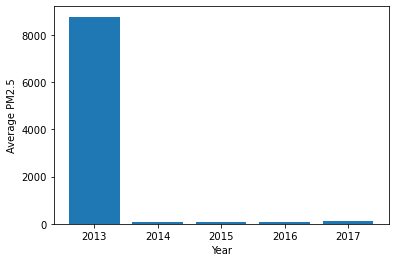

In [16]:
# Bar Plot

plt.bar(year,max1)
plt.xlabel('Year')
plt.ylabel("Average PM2.5")
plt.show()

#### Observation - Average Pm2.5 was very high in year 2013 and drastically decreased onwards

<AxesSubplot:xlabel='month'>

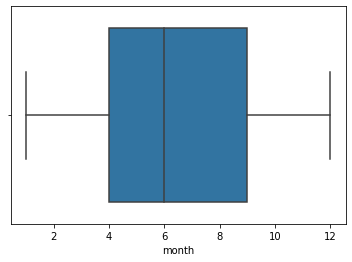

In [17]:
sns.boxplot(df['month'])    # Box Plot for month column

In [18]:
# Checking for outliers present in day column

df[df['day']<0] 

year  month     day  hour  PM2.5  temperature pressure  rain  \
24455  2016    1.0 -5656.0  12.0   91.0          3.0   1016.1   0.0   

      wind_direction  wind_speed  
24455            WNW         2.5

In [19]:
df.drop(24455,inplace=True)     # Removing outlier

<AxesSubplot:xlabel='month', ylabel='Density'>

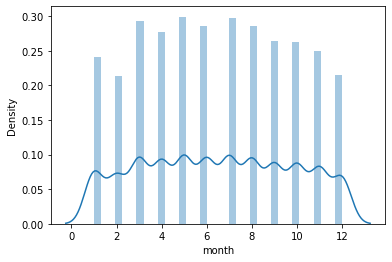

In [20]:
sns.distplot(df['month'])       # Distribution Plot for month column

<AxesSubplot:xlabel='day', ylabel='Density'>

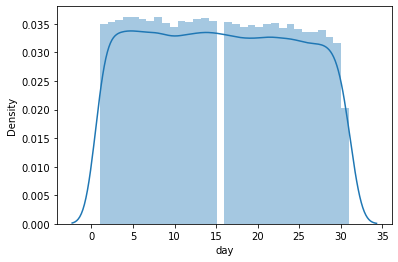

In [21]:
sns.distplot(df['day'])        # Distribution plot for day column

In [22]:
df['hour'].describe()          # Found an outlier as min is in negative

count    31369.000000
mean        11.290733
std         37.212603
min      -6464.000000
25%          5.000000
50%         11.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

In [23]:
df[df['hour']<0]                # Removing outlier in hour column

year  month   day    hour  PM2.5  temperature pressure  rain  \
24391  2016    1.0  11.0 -6464.0   15.0         -4.7   1031.2   0.0   

      wind_direction  wind_speed  
24391             NW         3.4

In [24]:
df.drop(24391,inplace=True)

<AxesSubplot:xlabel='hour', ylabel='Density'>

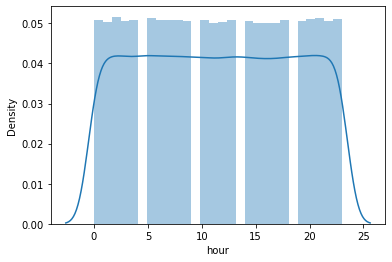

In [25]:
sns.distplot(df['hour'])       # Distribution plot for hour column

In [26]:
# Changing data type of pressure column into float type 


def f(s):
    if s=='':
        return None
    else:
        return float(s)

df['pressure']=df['pressure'].apply(f)

<AxesSubplot:xlabel='pressure'>

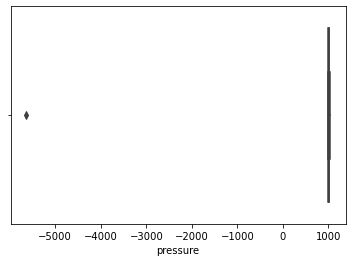

In [27]:
sns.boxplot(df['pressure'])      # Box Plot For Pressure Column

#### We can clearly observe that there are outliers present in pressure features

In [28]:
df[df['pressure']<0]              # Checking and finding Outliers

year  month  day  hour  PM2.5  temperature  pressure  rain  \
24314  2016    1.0  8.0  14.0    8.0          1.2   -5646.0   0.0   

      wind_direction  wind_speed  
24314            NNE         2.4

In [29]:
df.drop(24314,inplace=True)       # Droping the outlier column

<AxesSubplot:xlabel='pressure'>

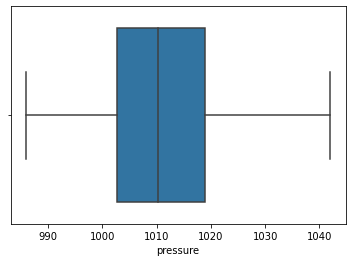

In [30]:
sns.boxplot(df['pressure'])       # After removal of Outliers from box plot

In [31]:
df['wind_direction'].unique()      # Finding Unique values in Wind direction column

array(['NNW', 'NW', 'N', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW'], dtype=object)

In [32]:
df['wind_direction'].value_counts()

NE     4455
ENE    3532
SW     3032
E      2334
NNE    2238
WSW    2047
SSW    1981
N      1884
NW     1552
ESE    1544
NNW    1354
S      1203
SE     1182
W      1087
WNW    1017
SSE     925
Name: wind_direction, dtype: int64

In [33]:
df['wind_speed'].describe()

count    31367.000000
mean         1.697265
std          1.337686
min        -79.000000
25%          0.900000
50%          1.400000
75%          2.200000
max         11.200000
Name: wind_speed, dtype: float64

<AxesSubplot:xlabel='wind_speed'>

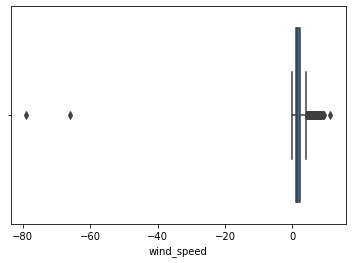

In [34]:
sns.boxplot(df['wind_speed'])

#### We can clearly observe outliers present in Wind Speed Column

In [35]:
higher=df['wind_speed'].quantile(0.99)
lower=df['wind_speed'].quantile(0.01)
df=df[(df['wind_speed']>=lower) & (df['wind_speed']<=higher)]

#### Used Percentile method to Remove Outliers

<AxesSubplot:xlabel='wind_speed'>

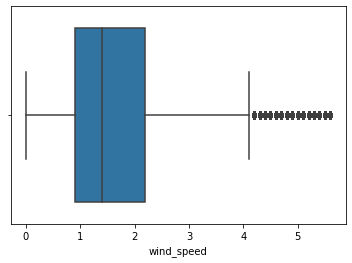

In [36]:
sns.boxplot(df['wind_speed'])

#### After Removing Outliers we can clearly observe that outliers have been reduced

<AxesSubplot:xlabel='wind_speed', ylabel='Density'>

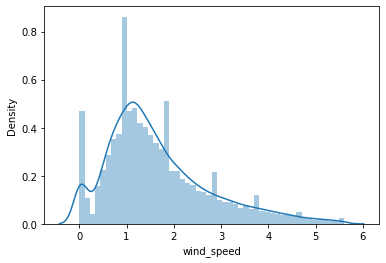

In [37]:
sns.distplot(df['wind_speed'])

<AxesSubplot:xlabel='rain', ylabel='Density'>

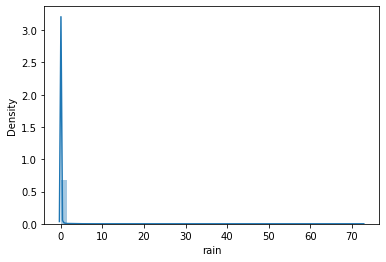

In [38]:
sns.distplot(df['rain'])

<AxesSubplot:xlabel='temperature', ylabel='Density'>

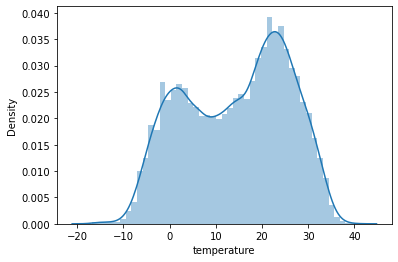

In [39]:
sns.distplot(df['temperature'])

### Distribution Plots of Temperature , Rain and Wind_Speed

In [40]:
# One Hot Encoding of Wind_direction
temp=pd.get_dummies(df['wind_direction'])
final_df=pd.concat([df,temp],axis=1)

#### Used One hot encoding for handeling categorical values as these are nominal values

In [41]:
final_df.drop('wind_direction',axis=1,inplace=True)

# Machine Learning Model

In [42]:
final_df['year'].value_counts()

2015    8386
2014    8188
2013    7248
2016    6956
2017     285
Name: year, dtype: int64

In [43]:
# Changed Year column to Integer

def f(s):
    return int(s)
final_df['year']=final_df['year'].apply(f)

In [44]:
final_df['year'].value_counts()

2015    8386
2014    8188
2013    7248
2016    6956
2017     285
Name: year, dtype: int64

### We are making separate ML models for each year and saving in Pickle files 
#### The Reason due to huge size of the dataset we were getting very low accuracy , so to increase the accuracy we separated the year to 5 different models

In [140]:
df_13=final_df[final_df['year']==2014]
df_13.drop('year',axis=1,inplace=True)

In [141]:
X=df_13.drop('PM2.5',axis=1)
Y=df_13['PM2.5']
X.shape
Y.shape

(8188,)

In [142]:
df_13.describe()

month          day         hour        PM2.5  temperature  \
count  8188.000000  8188.000000  8188.000000  8188.000000  8188.000000   
mean      6.304714    15.280899    11.471666    91.176172    14.478444   
std       3.324271     8.731587     6.933705    83.086883    11.109223   
min       1.000000     1.000000     0.000000     3.000000   -12.200000   
25%       3.000000     8.000000     5.000000    29.000000     4.400000   
50%       6.000000    15.000000    11.000000    70.000000    15.700000   
75%       9.000000    23.000000    18.000000   126.000000    23.300000   
max      12.000000    31.000000    23.000000   584.000000    40.500000   

          pressure         rain   wind_speed           E          ENE  ...  \
count  8188.000000  8188.000000  8188.000000  8188.00000  8188.000000  ...   
mean   1010.729421     0.060552     1.435271     0.06021     0.134099  ...   
std       9.996120     0.825579     1.074471     0.23789     0.340779  ...   
min     987.700000     0.000000     0.000000     0.00000     0.000000  ...   
25%    1002.000000     0.000000     0.700000     0.00000     0.000000  ...   
50%    1010.100000     0.000000     1.300000     0.00000     0.000000  ...   
75%    1019.000000     0.000000     1.900000     0.00000     0.000000  ...   
max    1036.000000    40.700000     5.600000     1.00000     1.000000  ...   

               NNW           NW            S           SE          SSE  \
count  8188.000000  8188.000000  8188.000000  8188.000000  8188.000000   
mean      0.033830     0.025159     0.032487     0.023937     0.021983   
std       0.180802     0.156617     0.177299     0.152864     0.146638   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               SSW           SW            W          WNW          WSW  
count  8188.000000  8188.000000  8188.000000  8188.000000  8188.000000  
mean      0.060821     0.108207     0.045799     0.025647     0.091964  
std       0.239016     0.310661     0.209061     0.158090     0.288993  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 24 columns]

In [143]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=13)

In [144]:
# Random Forest Regressor

from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(X_train,Y_train)
model3.score(X_test,Y_test)

0.8174551228526508

In [145]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor
model4=GradientBoostingRegressor()
model4.fit(X_train,Y_train)
model4.score(X_test,Y_test)

0.4770366854450331

In [146]:
# Extra Tree Regressor

from sklearn.ensemble import ExtraTreesRegressor
model5=ExtraTreesRegressor()
model5.fit(X_train,Y_train)
model5.score(X_test,Y_test)

0.7924321713366254

In [147]:
# Support Vector Regressor

from sklearn.svm import SVR
model6=SVR(kernel='rbf')
model6.fit(X_train,Y_train)
model6.score(X_test,Y_test)

-0.0565374349124097

In [148]:
# Linear Regresson

from sklearn.linear_model import LinearRegression
model7=LinearRegression()
model7.fit(X_train,Y_train)
model7.score(X_test,Y_test)

0.13351586551647587

In [149]:
# Prediction of X test data

ans3=model3.predict(X_test)

In [150]:
# Checking Losses and Errors

from sklearn.metrics import mean_squared_error,mean_squared_log_error
print(mean_squared_error(Y_test,ans3))
mean_squared_log_error(Y_test,ans3)

1274.193162636752


0.3224524868430815

### As we can observe that we applied a lot of Regression Ml Algorithms and almost for every year we are getting highest accuracy in Random Forest Regressor , so we have used it for further Hyper parameter Tuning and deployment

### Cross Validation and Hyper Parameter Tuning

In [151]:
from sklearn.model_selection import GridSearchCV , TimeSeriesSplit

In [152]:
# Declaring Parameters for Hyper Parameter Tuning

parameters={
    'n_estimators':[50,100,150,200,250,300,350,400,450,500,550,600],
    'criterion':['squared_error','absolute_error','poisson']
}
model3=RandomForestRegressor()

In [153]:
# Cross Validation 

tscv=TimeSeriesSplit(n_splits=10)
regcv=GridSearchCV(model3,param_grid=parameters,cv=tscv)  

## Here we used Time Series Split for Cross Validation of data as The dataset itself contains values observed at fixed time intervals, in train/test sets. In each split, test indices must be higher than before, and thus shuffling in cross validator is inappropriate.

## Also Used Grid Search CV for Hyper Parameter Tuning where I passed custom parameters

In [154]:
regcv.fit(X,Y)  # Fitting the model

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600]})

In [155]:
regcv.best_params_

{'criterion': 'poisson', 'n_estimators': 600}

In [156]:
ans=regcv.predict(X_test)

In [157]:
from sklearn.metrics import r2_score
r2_score(ans,Y_test)

0.8935011843959583

# Saving as a model

In [158]:
import pickle
pickle.dump(regcv, open('tuned_model2014', 'wb'))

In [ ]:
final_df.to_csv('final_train.csv')